In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.gaussian_process as gp
import numpy as np
import random as rd


from google.colab import files
uploaded = files.upload()

import io
full_dataset = pd.read_csv(io.BytesIO(uploaded['pillar.csv']))
full_data = full_dataset.to_numpy()

Saving pillar.csv to pillar.csv


In [ ]:
def data_prep(full_data,p,k):
  rows, columns = full_data.shape
  full_data = full_dataset.to_numpy()
  rows, columns = full_data.shape
  sampling_tr = rd.sample(range(0,rows), k)
  X_tr = full_data[sampling_tr,0:columns-1]
  y_tr = full_data[sampling_tr,columns-1]
  partial_data = np.delete(full_data,sampling_tr,0)
  sampling_te = rd.sample(range(0,rows-k), p)
  X_te = partial_data[sampling_te,0:columns-1]
  y_te = partial_data[sampling_te,columns-1]
  return X_tr,y_tr,X_te,y_te


def plot_gp_3d(x_i,x_j,mean,cov,x_1,x_2,y,X_tr,y_tr):
  fig = plt.figure(figsize=(14,6))
  ax1= fig.add_subplot(121,projection='3d')
  #show mean values
  ax1.plot_surface(x_i,x_j,mean.reshape(x_i.shape),cmap='copper',rstride=1,cstride=1,vmin=np.amin(mean),vmax=np.amax(mean),linewidth=0,antialiased='True',alpha=0.5)
  ax1.set_xlabel('E/Y')
  ax1.set_ylabel('Poisson ratio')
  ax1.set_zlabel('Modified K values')
  ax1.scatter(x_1,x_2,y,c='b',marker='.',label='Ground Truth')
  ax1.scatter(X_tr[:,0],X_tr[:,1],y_tr,c='r',marker='o',label='Train Truth')  
  #Plot confidence interval surface
  ax2 = fig.add_subplot(122,projection='3d')
  ax2.plot_surface(x_i,x_j,mean.reshape(x_i.shape),cmap='copper',rstride=1,cstride=1,vmin=np.amin(mean),vmax=np.amax(mean),linewidth=0,antialiased='True',label='GP prediction')
  #show 96% confidence interval
  ax2.plot_surface(x_i,x_j,mean.reshape(x_i.shape)+2*np.sqrt(cov.reshape(x_i.shape)),cmap='twilight',rstride=1,cstride=1,vmin=np.amin(mean),vmax=np.amax(mean),linewidth=0,antialiased='True',alpha=0.4,label='Upper bound')
  ax2.plot_surface(x_i,x_j,mean.reshape(x_i.shape)-2*np.sqrt(cov.reshape(x_i.shape)),cmap='twilight_shifted',rstride=1,cstride=1,vmin=np.amin(mean),vmax=np.amax(mean),linewidth=0,antialiased='True',alpha=0.4,label='Lower bound')
  #show data samples
  ax2.set_ylabel('E/Y')
  ax2.set_xlabel('Poisson ratio')
  ax2.set_zlabel('Modified K values')
  # ax2.legend()
  plt.show()  

#Choose kernel and load model
#kernel = gp.kernels.RBF(1.0, (5e-1, 5e1)) 
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e2)) * gp.kernels.RBF(10.0, (1e-1, 1e2))

#kernel = gp.kernels.RationalQuadratic(1.0, 0.5, (5e-05, 5e5), (5e-05, 5e5))
#kernel = gp.kernels.ExpSineSquared(1.0, 1.0, (1e-05, 1e5), (1e-05, 1e5))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20,alpha=0.00001)  

In [ ]:
APE = np.zeros(8)
p=200
j = 0
for k in range(25,376,50):
  APE_tmp = 0.
  for i in range(1,6,1):
    kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e2)) * gp.kernels.RBF(10.0, (1e-1, 1e2))
    model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15,alpha=0.00001) 
    X_tr,y_tr,X_te,y_te = data_prep(full_data,p,k)
    model.fit(X_tr, y_tr)
    params = model.kernel_.get_params()
    y_pred, std = model.predict(X_te, return_std=True)
    APE_tmp += (np.sqrt((((y_pred-y_te)/y_te)**2))).max()
    kernel = []
    model = [] 
  APE[j] = APE_tmp/5.
  print(APE[j])
  j = j+1

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.09821397373269564


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.06448544030976579
0.057571072975353854


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.05259397014426216
0.045852097025409544


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.05251643956505153


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.04540589563256114


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.05141436661221106


[0.07121397 0.03748544 0.03057107 0.02559397 0.0188521  0.02551644
 0.0184059  0.02441437]


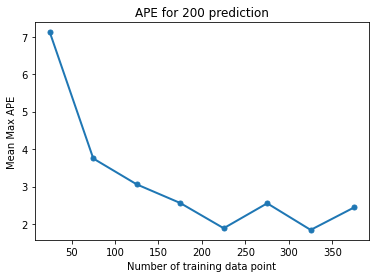

In [ ]:
plt.plot(range(25,376,50),APE*100,'.-',linewidth=2,markersize=10)
plt.xlabel('Number of training data point')
plt.ylabel('Mean Max APE')
plt.title('APE for 200 prediction')

# plt.savefig('APE.png',dpi=300)
# files.download('APE.png') 

print(APE)